## Number estimation using Weber Fraction

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The target number (i.e. ground truth) for each experimental trial is provided in the following numpy array.

In [2]:
targets = np.array([3, 8, 40, 2, 5, 30, 7, 35, 6, 15, 10, 20, 9, 25, 4])

Read in the experimental data--- `df` is a dataframe of size _(Participants x Trials)_.

In [3]:
df = pd.read_csv('data-number-estimation.csv')

Compute the $mean$ and standard deviation ($sd$) for each trial

In [4]:
# Storing as a dataframe for easy manipulation and plotting later
mn = df.mean().to_frame("mean")
sd = df.std().to_frame("standard deviation")
mn.head()

,mean
Trial 1,3.000000
Trial 2,8.319149
Trial 3,28.872340
Trial 4,1.978723
Trial 5,5.085106


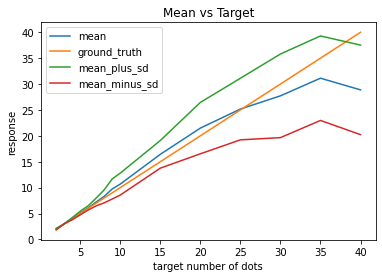

In [5]:
# Setting dataframes with the sorted target numbers as the index for easy plotting
mn = mn.assign(ground_truth=targets).set_index(targets).sort_index()
sd = sd.set_index(targets).sort_index()

# Creating new columns for "mean + sd" and "mean - sd" 
mn["mean_plus_sd"] = mn["mean"].add(sd["standard deviation"])
mn["mean_minus_sd"] = mn["mean"].sub(sd["standard deviation"])

# Plotting all the data!
ax = mn.plot(title="Mean vs Target")
ax.set_xlabel("target number of dots")
ax.set_ylabel("response")
ax.legend()
plt.show()

In [6]:
sd["sd_by_mean"] = sd["standard deviation"].div(mn["mean"])
sd

,standard deviation,sd_by_mean
2,0.145865,0.073717
3,0.000000,0.000000
4,0.208514,0.052129
5,0.350762,0.068978
6,0.408059,0.067059
7,0.757937,0.104774
8,1.252934,0.150608
9,1.938938,0.198974
10,2.117283,0.198232
15,2.668208,0.162443


Plot $\frac{sd}{mean}$ ratios against the target numbers.

Text(0, 0.5, 'standard deviation')

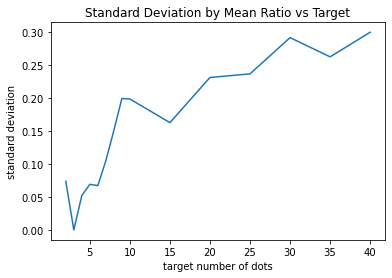

In [8]:
ax = sd["sd_by_mean"].plot(title="Standard Deviation by Mean Ratio vs Target")
ax.set_xlabel("target number of dots")
ax.set_ylabel("standard deviation")
plt.show()

In [9]:
# This number is chosen because the standard deviation grows non-linearly below 10, which would otherwise skew the Weber fraction 
# Also, numbers below ~9 can be easily counted instead of being estimated
thres = 10

In [10]:
weber_targets = np.where(sd["sd_by_mean"].index > thres)[0] # Indices where target number is greater than threshold
weber = np.mean(sd["sd_by_mean"].iloc[weber_targets]) # The mean of the sd_by_mean at given indices
weber

0.17867849994251422